Problem Set 2:

Import Libraries

In [8]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
import plotly.io as pio

# Set Plotly rendering for Jupyter Notebook
pio.renderers.default = 'notebook'

Problem 1

Reverse Engineer Roots and Coefficients

In [9]:
def f(r, ϕ):
    """
    Generates roots and coefficients for the characteristic polynomial.

    Parameters:
    r (float): Modulus of the root.
    ϕ (float): Angle in radians.

    Returns:
    tuple: ρ1, ρ2, a, b (characteristic roots and coefficients).
    """
    g1 = cmath.rect(r, ϕ)  # Generate two complex roots
    g2 = cmath.rect(r, -ϕ)
    ρ1 = g1 + g2
    ρ2 = -g1 * g2
    b = -ρ2
    a = ρ1 - b
    return ρ1, ρ2, a, b

# Set parameters
r = 1
period = 16
ϕ = 2 * math.pi / period

# Generate roots and coefficients
ρ1, ρ2, a, b = f(r, ϕ)
print(f"a, b = {a}, {b}")
print(f"ρ1, ρ2 = {ρ1}, {ρ2}")

a, b = (0.8477590650225735+0j), (1-0j)
ρ1, ρ2 = (1.8477590650225735+0j), (-1+0j)


Calculating Gamma

In [10]:
Y_t_1 = 656.8535592272043
Y_t_2 = 656.8535592272043
gamma = Y_t_1 - a.real * Y_t_1
print(f"Gamma: {gamma}")

Gamma: 100.0


Categorize Solution Function:

In [11]:
def categorize_solution(ρ1, ρ2):
    """
    Classifies the type of solution based on ρ1 and ρ2.
    """
    discriminant = ρ1 ** 2 + 4 * ρ2
    if ρ2 > 1 + ρ1 or ρ2 < -1:
        print("Explosive oscillations")
    elif ρ1 + ρ2 > 1:
        print("Explosive growth")
    elif discriminant < 0:
        print("Complex roots with modulus equal to one; this implies stable cycles.")
    else:
        print("Real roots with absolute values less than one; this implies smooth convergence.")

Plot Non Stochastic

Complex roots with modulus equal to one; this implies stable cycles.


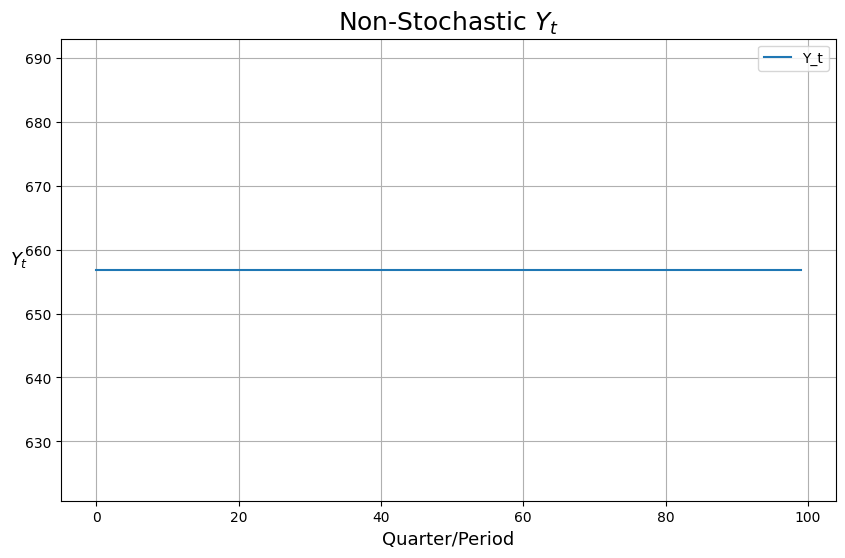

In [12]:
def plot_y(function, title="Time Series of $Y_t$", shock=None):
    """
    Plots the time series of Y_t.

    Parameters:
    function (list): Values of Y_t.
    title (str): Title of the plot.
    shock (int): Period of government spending shock, if any.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(function, label='Y_t')
    if shock:
        plt.axvline(shock, color="red", linestyle="--", label="Govt, Spending Shock")
    plt.xlabel('Quarter/Period', fontsize=13)
    plt.ylabel('$Y_t$', fontsize=13, rotation=0)
    plt.title(title, fontsize=18)
    plt.legend()
    plt.grid(True)
    plt.show()

def y_nonstochastic(y_0=Y_t_1, y_1=Y_t_1, α=a.real, β=b.real, γ=100, n=100):
    """
    Computes the time series of non-stochastic Y_t.

    Parameters:
    y_0, y_1 (float): Initial values.
    α, β (float): Coefficients.
    γ (float): Intercept.
    n (int): Number of periods.

    Returns:
    list: Time series of Y_t.
    """
    ρ1 = α + β
    ρ2 = -β
    categorize_solution(ρ1, ρ2)

    y_t = [y_0, y_1]
    for t in range(2, n):
        y_t.append(ρ1 * y_t[t - 1] + ρ2 * y_t[t - 2] + γ)
    return y_t

plot_y(y_nonstochastic(), "Non-Stochastic $Y_t$")

### Economic Model Equations

Now we know our three equations. Our **consumption function** is:

<a id='equation-consumption'></a>
$$
C_t = 0.848 \cdot Y_{t-1} + \left(100 + 0j\right)
$$

with the **investment accelerator**:

<a id='equation-accelerator'></a>
$$
I_t = 1.000 \cdot \left(Y_{t-1} - Y_{t-2}\right)
$$

and the **national income identity**:

<a id='equation-income-identity'></a>
$$
Y_t = C_t + I_t + G_t
$$

In this scenario, the zeros at the end are due to both investment and government spending being zero. Based on our theoretical model, we would expect this to plot out as a straight line since output is staying constant.

Given that $ Y_{t-1} = Y_{t-2} $￼, investment will be zero. With government spending also equal to zero, the national income identity simplifies to Y_{t} = Y_{t}￼. Using the value of alpha that we previously calculated, we can determine the gamma that satisfies the consumption equation.

Problem 2: Stochastic Simulation

Complex roots with modulus equal to one; this implies stable cycles.
[0.92387953+0.38268343j 0.92387953-0.38268343j]
Roots are complex
Roots are not less than one


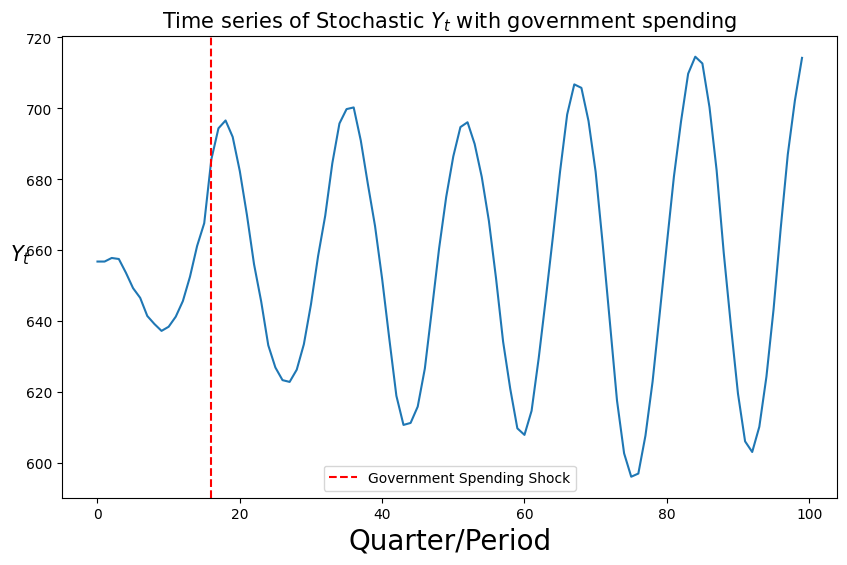

In [13]:
y=656.8535592272043
def plot_y_stochastic(function=None):

    """Function plots path of Y_t"""

    plt.subplots(figsize=(10, 6))
    plt.plot(function)
    plt.xlabel('Quarter/Period', fontsize=20)
    plt.ylabel('$Y_t$', fontsize=15, rotation=0)
    plt.axvline(16, color="red", linestyle="--", label="Government Spending Shock")
    plt.title('Time series of Stochastic $Y_t$ with government spending', fontsize=15)
    plt.legend()
    #plt.grid()
    plt.show()

np.random.seed(1234)
def y_stochastic_g(y_0=y,
                   y_1=y,
                   α=a.real,
                   β=b.real,
                   γ=100,
                   n=100,
                   σ=2,
                   g=10,
                   g_t=10,
                   duration='one-off'):

    """This program computes a response to a permanent increase
    in government expenditures that occurs at time 20
    """

    # Useful constants
    ρ1 = α + β
    ρ2 = -β

    # Categorize solution
    categorize_solution(ρ1, ρ2)

    # Find roots of polynomial
    roots = np.roots([1, -ρ1, -ρ2])
    print(roots)

    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')

    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')

    # Generate shocks
    ϵ = np.random.normal(0, 1, n)

    def transition(x, t, g):

        # Non-stochastic - separated to avoid generating random series
        # when not needed
        if σ == 0:
            return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ + g

        # Stochastic
        else:
            ϵ = np.random.normal(0, 1, n)
            return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ + g + σ * ϵ[t]

    # Create list and set initial conditions
    y_t = [y_0, y_1]

    # Generate y_t series
    for t in range(2, n):

        # No government spending
        if g == 0:
            y_t.append(transition(y_t, t))

        # Government spending (no shock)
        elif g != 0 and duration == None:
            y_t.append(transition(y_t, t))

        # Permanent government spending shock
        elif duration == 'permanent':
            if t < g_t:
                y_t.append(transition(y_t, t, g=0))
            else:
                y_t.append(transition(y_t, t, g=g))

        # One-off government spending shock
        elif duration == 'one-off':
            if t == g_t:
                y_t.append(transition(y_t, t, g=g))
            else:
                y_t.append(transition(y_t, t, g=0))
    return y_t

plot_y_stochastic(y_stochastic_g(y_0=y, y_1=y,α=a.real,β=b.real,γ=100,n=100, σ=2,g=10,g_t=16,duration='one-off'))





Based on the plot above, we believe that the govenment spending does induce the business cycle. The plot in question 1 shows that  without government spending, GDP stays constant. In the graph immediately above for question 2, prior to the government spending, the GDP declines prior to increasing at an increasing rate and this change in the rate of change is what we belive the government spending causes.

Problem 3: KDE

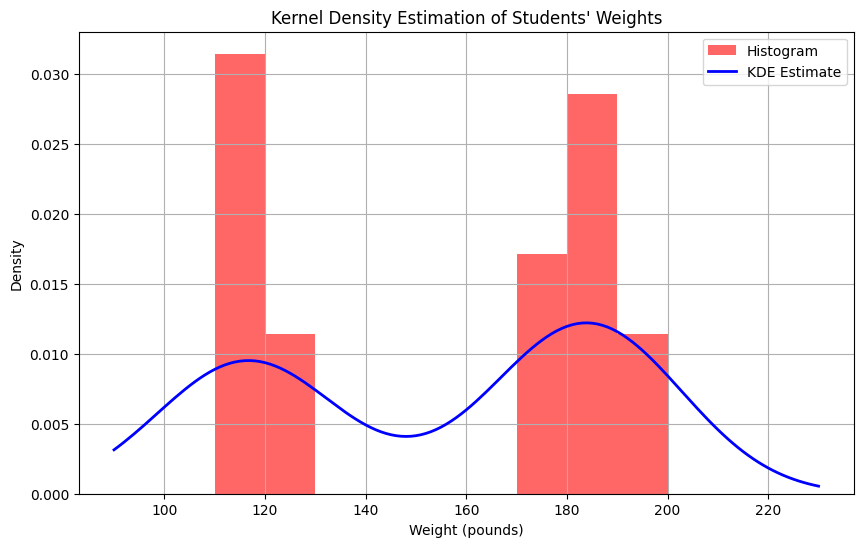

Using a threshold of 155.09 pounds:
Estimated number of women: 15
Estimated number of men: 20


In [14]:
weights = np.array([182, 127, 117, 187, 110, 176, 189, 174, 112, 112, 115, 171, 119,
                    179, 172, 189, 195, 125, 116, 182, 181, 186, 196, 110, 111, 129,
                    193, 122, 189, 118, 171, 110, 186, 194, 183])

grid = np.arange(90, 231, 1)
kde = gaussian_kde(weights)
kde_values = kde(grid)

plt.figure(figsize=(10, 6))
plt.hist(weights, bins=np.arange(90, 230, 10), density=True, alpha=0.6, color="red", label="Histogram")
plt.plot(grid, kde_values, color="blue", label="KDE Estimate", linewidth=2)
plt.title("Kernel Density Estimation of Students' Weights")
plt.xlabel("Weight (pounds)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

threshold = np.average(weights)
women_count = np.sum(weights < threshold)
men_count = len(weights) - women_count

print(f"Using a threshold of {threshold:.2f} pounds:")
print(f"Estimated number of women: {women_count}")
print(f"Estimated number of men: {men_count}")